In [ ]:
#librarii necesare pentru realizarea proiectului
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random


In [ ]:
InputIm_FileName="floare.jpg"
InImgGray=cv2.imread(InputIm_FileName, 0) #0 indică faptul ca imaginea trebuie citita in modul gri
if InImgGray is None:
  print("Nu s-a putut deschide imaginea sau nu exista pe disc fisierul cu numele",InputIm_FileName)

In [ ]:
data = np.array(image).astype(np.float32) / 255. #coverteste imaginea intr-o matrice NumPY, biblioteca ce ne ajuta sa utilizam operatii matematice; impartim cu 255 pt normalizare

In [ ]:

path = "floare.jpg"
image = Image.open(path)
data = np.array(image).astype(np.float32) / 255.#impartim la 255 pentru a normaliza valorile pixelilor
if len(data.shape)==2:  #verifica daca imaginea are 2 dimensiuni/parametrii si in caz afirmativ mai adauga unul pentru a putea fi prelucrata mai jos
    data = data[:,:,np.newaxis]#adauga o noua dimensiune(in cazul nostru de culoare)aceasta val de culoare va fi 0 mai jos(gri)

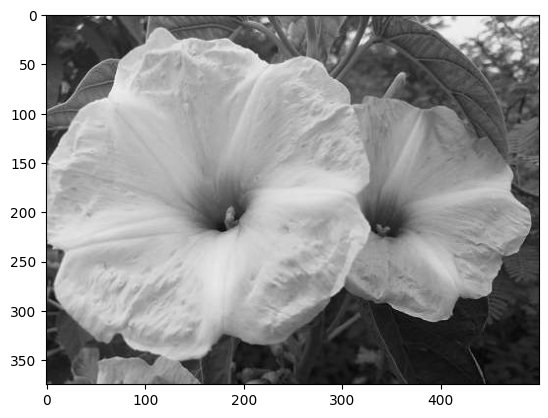

In [ ]:
plt.imshow(data[:,:,0], cmap='gray')#afisewza imaginea in tonuri de gri

In [ ]:
data_rounded = np.round(data)

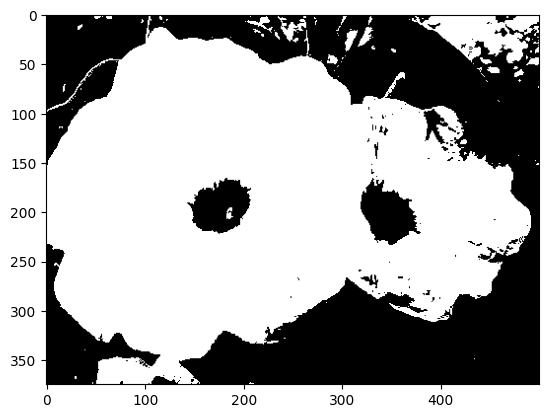

In [ ]:
plt.imshow(data_rounded[:,:,0], cmap='gray')

In [ ]:
data.shape

(375, 500, 3)

In [ ]:
#Floyd-Steinberg
def floyd_steinberg(image):
    Lx, Ly, Lc = image.shape
    for j in range(Ly):
        for i in range(Lx):
            for c in range(Lc):
                rounded = round(image[i,j,c]) #rotunjim val fiecarui pixel la un intreg cu valori intre 0 si 1
                err = image[i,j,c] - rounded #calculul errii dintre valoarea pixelului initial si valoarea rotunjita
                image[i,j,c] = rounded
                if i<Lx-1: image[i+1,j,c] += (7/16)*err   #distribuie eroarea catre pixelii invecinati cu coeficienti specifici
                if j<Ly-1:
                    image[i,j+1,c] += (5/16)*err
                    if i>0: image[i-1,j+1,c] += (1/16)*err
                    if i<Lx-1: image[i+1,j+1,c] += (3/16)*err
    return image

In [ ]:
data_fs = floyd_steinberg(data.copy())

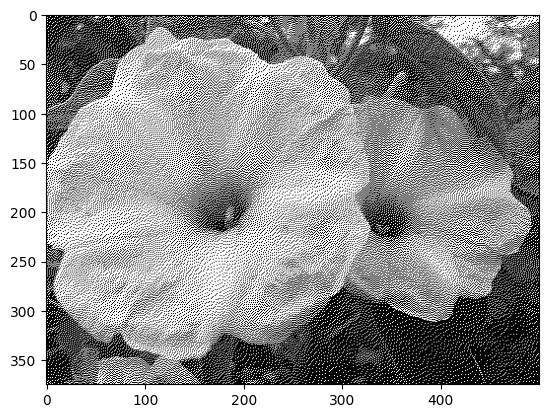

In [ ]:
plt.imshow(data_fs[:,:,0], cmap='gray') #comanda afiseaza o imagine din harta de culori gri; iar in cazul in care imaginea e color lucreaza numai cu primul canal

In [ ]:
#Atkinson Dithering
#def atkinson(image):
#   frac = 8
#   Lx, Ly, Lc = image.shape
#   for j in range(Ly):
#       for i in range(Lx):
#           for c in range(Lc):
#               rounded = round(image[i,j,c])
#               err = image[i,j,c] - rounded
#               image[i,j,c] = rounded
#               if i<Lx-1: image[i+1,j,c] += err / frac
#               if i<Lx-2: image[i+2,j,c] += err /frac
#               if j<Ly-1:
#                   image[i,j+1,c] += err / frac
#                   if i>0: image[i-1,j+1,c] += err / frac
#                   if i<Lx-1: image[i+1,j+1,c] += err / frac
#               if j<Ly-2: image[i,j+2,c] += err / frac
#   return image

In [ ]:
#data_atk = atkinson(data.copy())

Text(0.5, 1.0, 'Floyd-Steinberg')

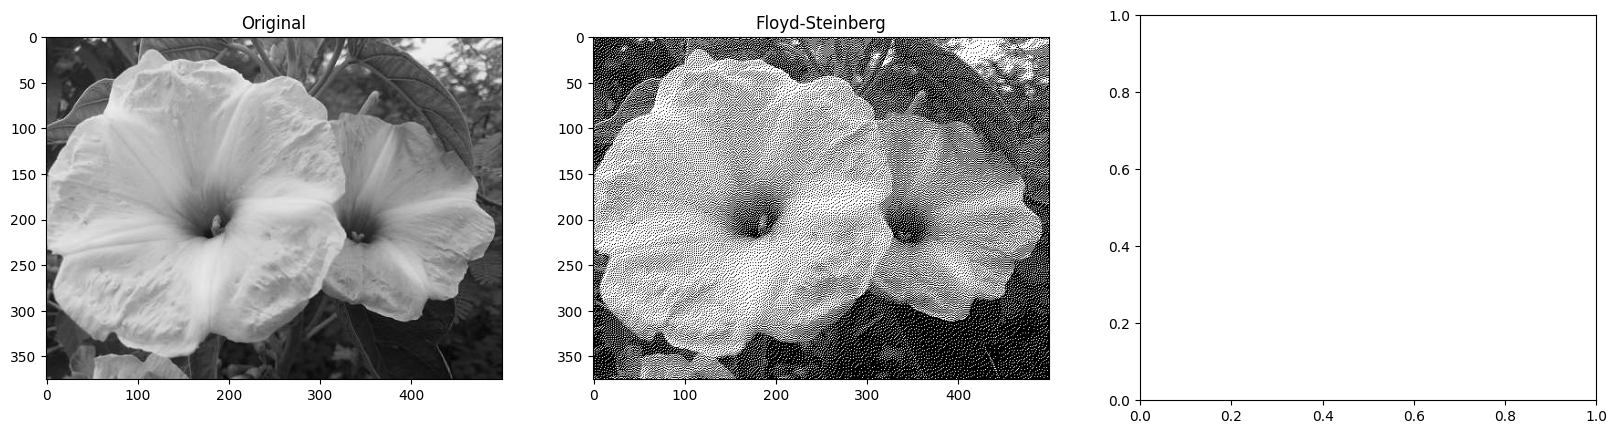

In [ ]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
plt.imshow(data, cmap = 'gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(data_fs, cmap='gray')
plt.title('Floyd-Steinberg')
#plt.subplot(132)
#plt.imshow(data_atk, cmap='gray')
#plt.title('Atkinson')

In [ ]:

image = Image.open('shrekcol.png') #incarca imaginea din fisier
data = np.array(image).astype(np.float32) / 255. #normalizeaza imaginea;si o face pe 32 de biti pt prelucrare
data_fs = floyd_steinberg(data.copy())#aplica algoritmul floyd pe o copie a imaginii originale
#data_atk = atkinson(data.copy())

Text(0.5, 1.0, 'Floyd-Steinberg')

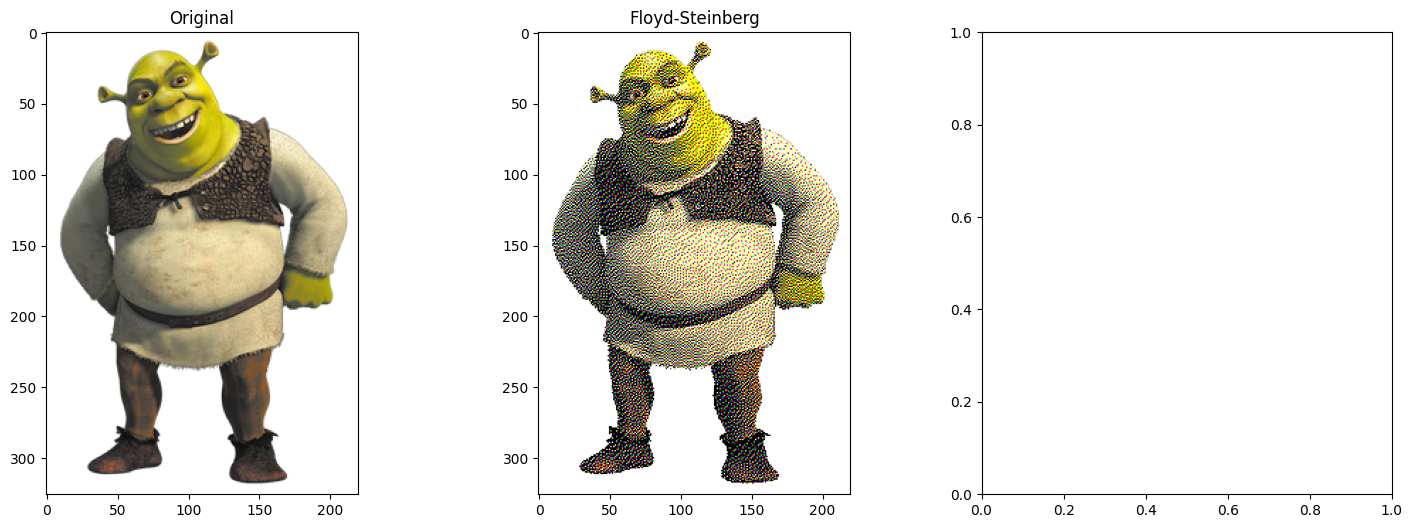

In [ ]:
plt.subplots(1,3,figsize=(18,6)) #dimensiune imaginii 18 cu 6 inch
plt.subplot(131)
plt.imshow(data)
plt.title('Original')
plt.subplot(132)
plt.imshow(data_fs)
plt.title('Floyd-Steinberg')
#plt.subplot(133)
#plt.imshow(data_atk)
#plt.title('Atkinson')

Text(0.5, 1.0, 'Floyd-Steinberg')

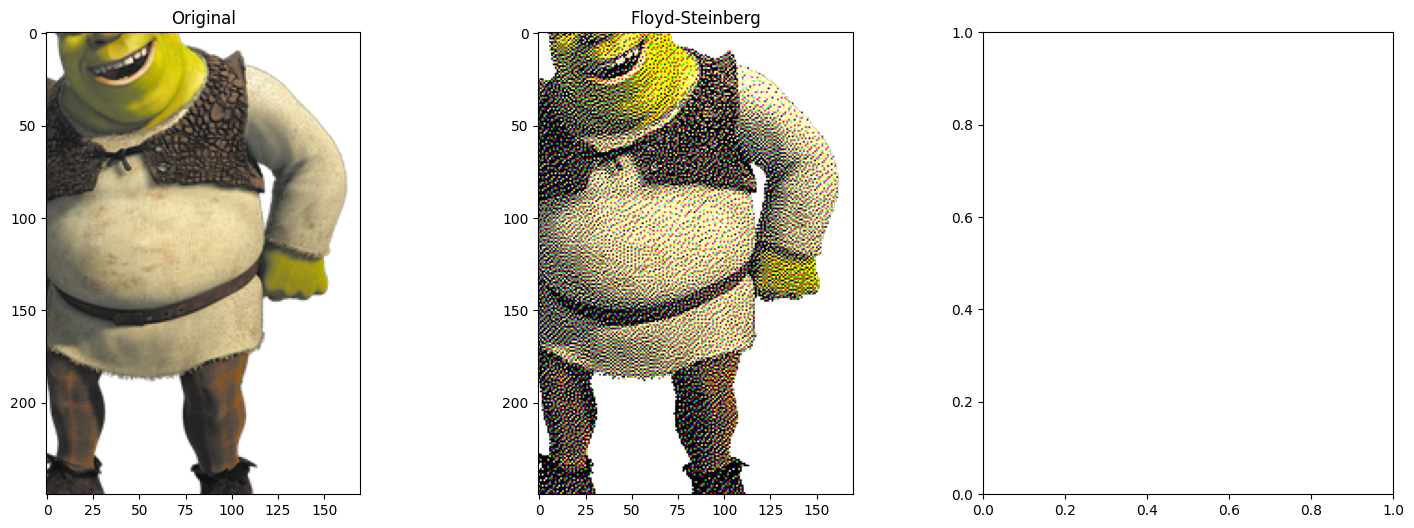

In [ ]:
#zoom pe toate pozele pentru anumite detalii specifice fiecarui algortim
plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
plt.imshow(data[50:300,50:300])
plt.title('Original')
plt.subplot(132)
plt.imshow(data_fs[50:300,50:300])
plt.title('Floyd-Steinberg')
#plt.subplot(133)
#plt.imshow(data_atk[50:300,50:300])
#plt.title('Atkinson')